# **Machine Learning MIIS (lab 2)**

### *(Due to Nov 9)*

The goal of this task is to experiment with different ML algorithms and analyze empirically the trade-off between overfitting and generalization.

We will continue using the Colab environment and [scikit-learn](https://scikit-learn.org/stable/user_guide.html).

Pick a classification dataset from the LIBSVM repository of datasets:
http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/


In [ ]:
# Example of downloading a dataset
!wget -t inf https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a


--2021-11-09 12:09:17--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114818 (112K)
Saving to: ‘a1a’

a1a                 100%[===================>] 112.13K   201KB/s    in 0.6s    

2021-11-09 12:09:19 (201 KB/s) - ‘a1a’ saved [114818/114818]



In [ ]:
# Example of loading a dataset
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file("a1a")
print(X_train)

  (0, 2)	1.0
  (0, 10)	1.0
  (0, 13)	1.0
  (0, 18)	1.0
  (0, 38)	1.0
  (0, 41)	1.0
  (0, 54)	1.0
  (0, 63)	1.0
  (0, 66)	1.0
  (0, 72)	1.0
  (0, 74)	1.0
  (0, 75)	1.0
  (0, 79)	1.0
  (0, 82)	1.0
  (1, 2)	1.0
  (1, 5)	1.0
  (1, 16)	1.0
  (1, 26)	1.0
  (1, 34)	1.0
  (1, 39)	1.0
  (1, 56)	1.0
  (1, 62)	1.0
  (1, 68)	1.0
  (1, 72)	1.0
  (1, 73)	1.0
  :	:
  (1603, 21)	1.0
  (1603, 35)	1.0
  (1603, 41)	1.0
  (1603, 47)	1.0
  (1603, 64)	1.0
  (1603, 70)	1.0
  (1603, 72)	1.0
  (1603, 73)	1.0
  (1603, 75)	1.0
  (1603, 79)	1.0
  (1603, 82)	1.0
  (1604, 3)	1.0
  (1604, 9)	1.0
  (1604, 14)	1.0
  (1604, 23)	1.0
  (1604, 37)	1.0
  (1604, 40)	1.0
  (1604, 51)	1.0
  (1604, 65)	1.0
  (1604, 66)	1.0
  (1604, 71)	1.0
  (1604, 73)	1.0
  (1604, 75)	1.0
  (1604, 81)	1.0
  (1604, 82)	1.0


## **1. Decision Trees**

**1.1.** Partition the dataset into a training and a testing set. Run a decision tree learning algorithm using the training set. Test the decision tree on the testing dataset and report the total classification error (i.e. 0/1 error).

[*Decision Trees in [scikit-learn](https://scikit-learn.org/stable/modules/tree.html)*]

In [3]:
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
!wget -t inf https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/australian_scale
X, y = load_svmlight_file("australian_scale")

--2021-11-09 21:50:30--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/australian_scale
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71160 (69K)
Saving to: ‘australian_scale’

australian_scale    100%[===================>]  69.49K   254KB/s    in 0.3s    

2021-11-09 21:50:32 (254 KB/s) - ‘australian_scale’ saved [71160/71160]



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)  #split with test set size 20% 

ml_tree = DecisionTreeClassifier(criterion='gini') #selecting Gini Impurity metric for a bit faster results
ml_tree.fit(X_train, y_train)
print("Total classification error: ",accuracy_score(y_test, ml_tree.predict(X_test)) )

Total classification error:  0.8260869565217391


**1.2.** Repeat the experiment with a different partition of the data. Plot the resulting trees.

[*Advice: it can be convenient to set a maximum depth for the tree. You can find different ways to plot the resulting trees [here](https://mljar.com/blog/visualize-decision-tree/).*]



Tree No.0, with test size of 90.0%, gives accuracy 0.7713365539452496 

Tree No.1, with test size of 80.0%, gives accuracy 0.7789855072463768 

Tree No.2, with test size of 70.0%, gives accuracy 0.8140495867768595 

Tree No.3, with test size of 60.0%, gives accuracy 0.8361445783132531 

Tree No.4, with test size of 50.0%, gives accuracy 0.808695652173913 

Tree No.5, with test size of 40.0%, gives accuracy 0.8369565217391305 

Tree No.6, with test size of 30.0%, gives accuracy 0.8317307692307693 

Tree No.7, with test size of 20.0%, gives accuracy 0.855072463768116 

Tree No.8, with test size of 10.0%, gives accuracy 0.8115942028985508 



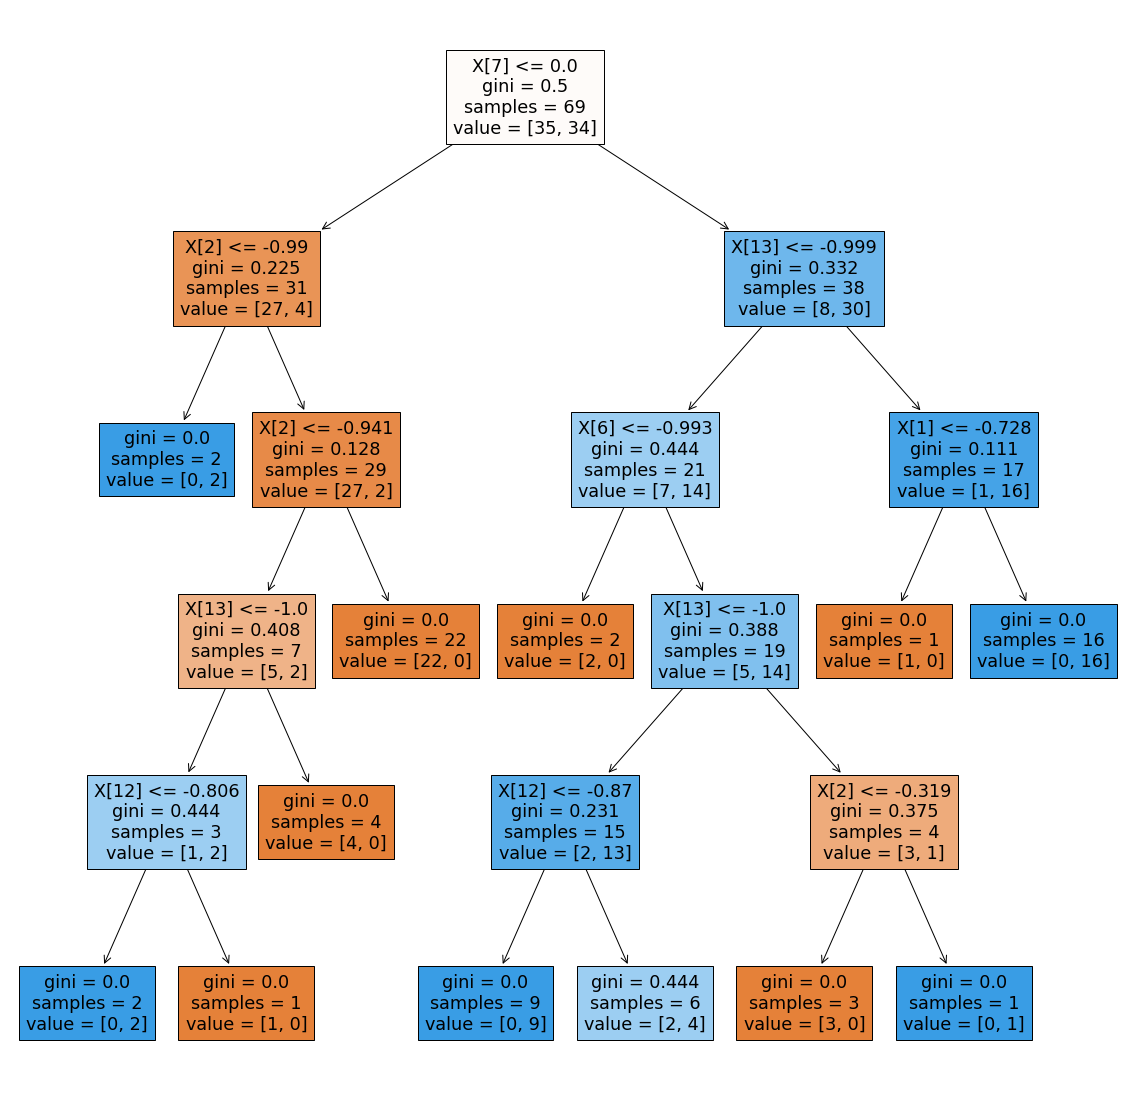

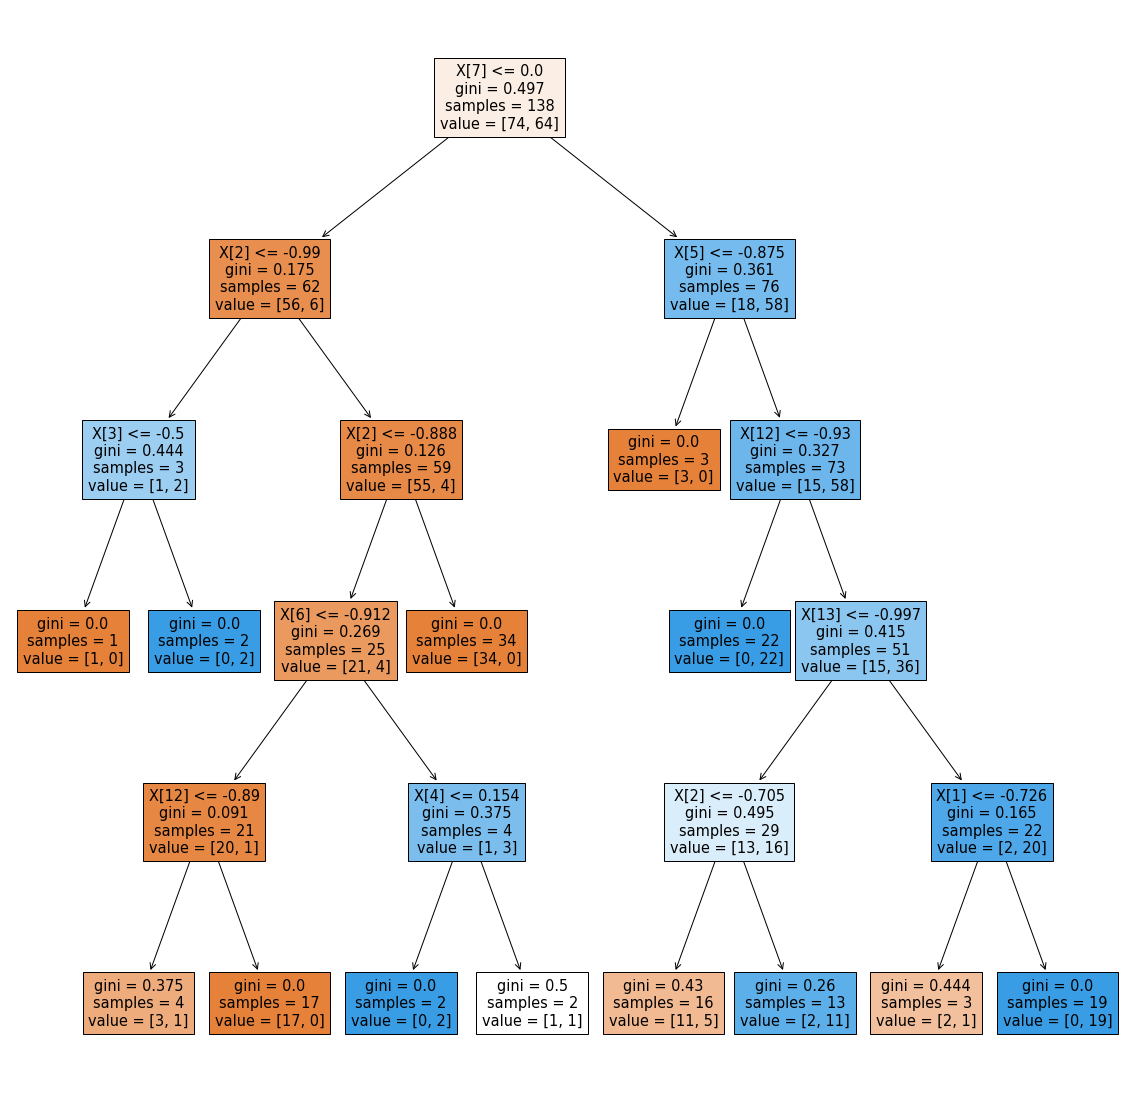

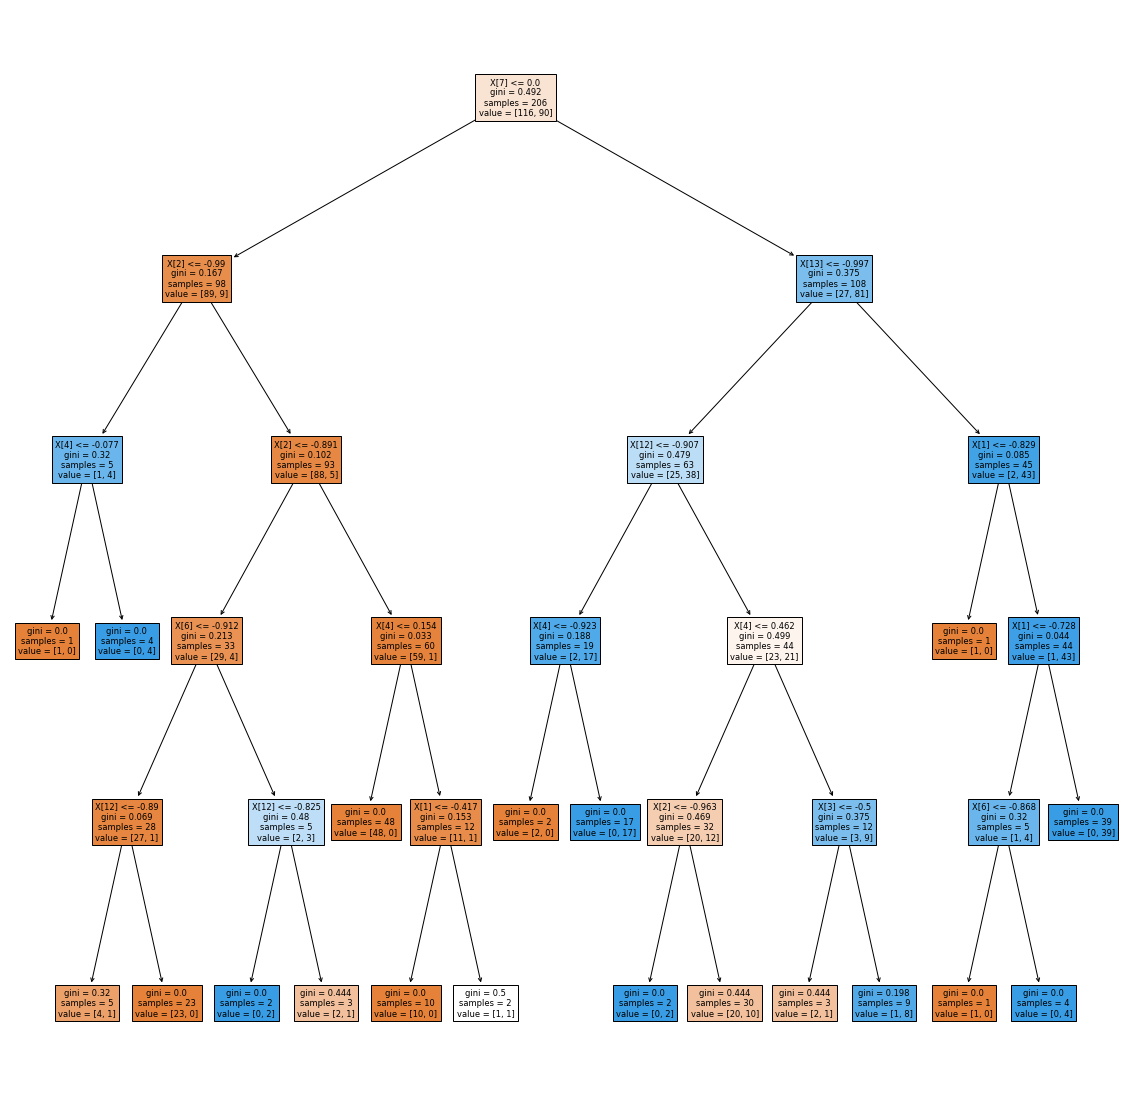

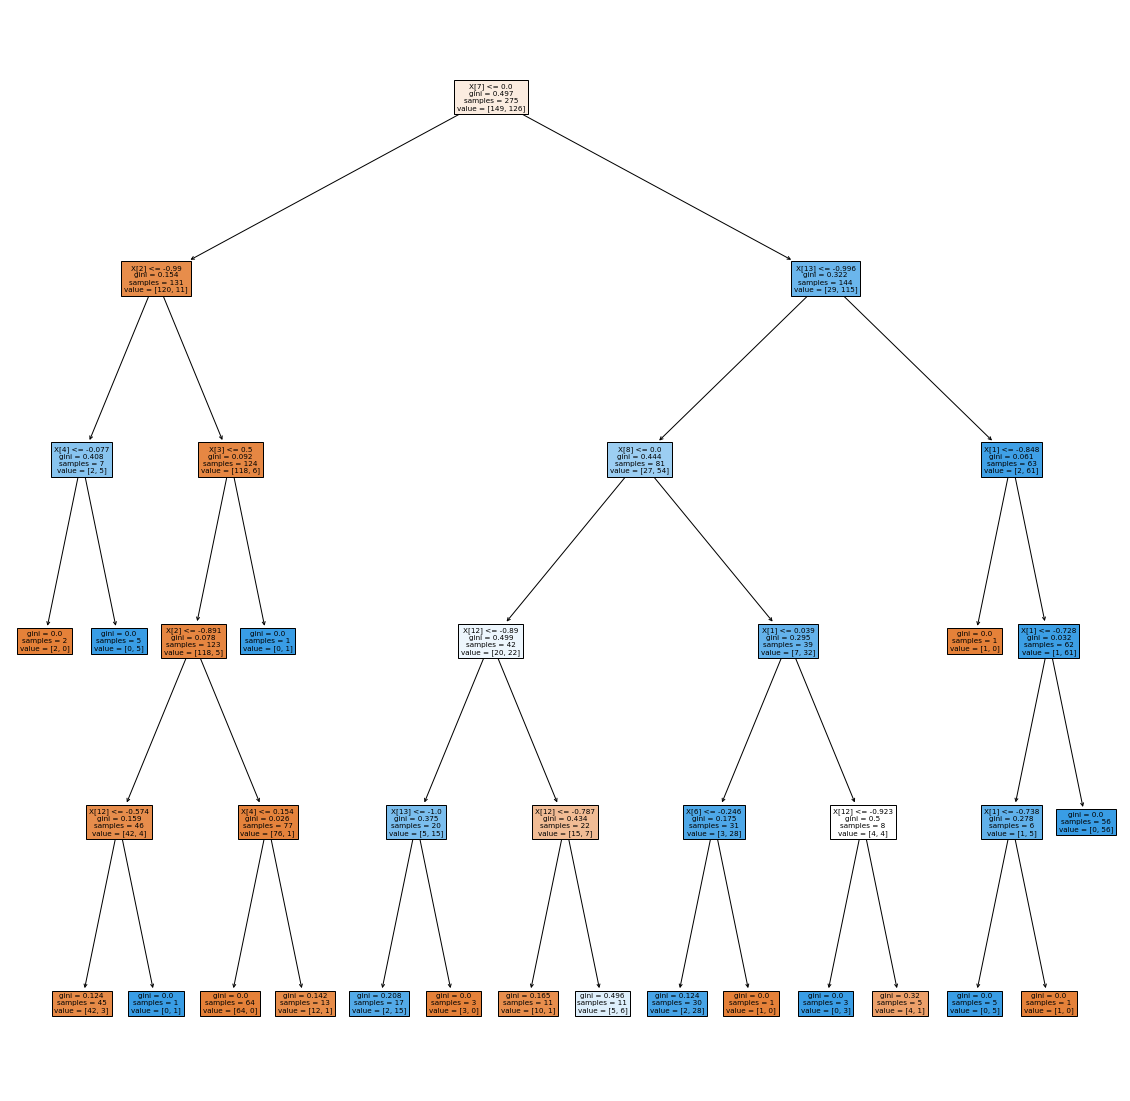

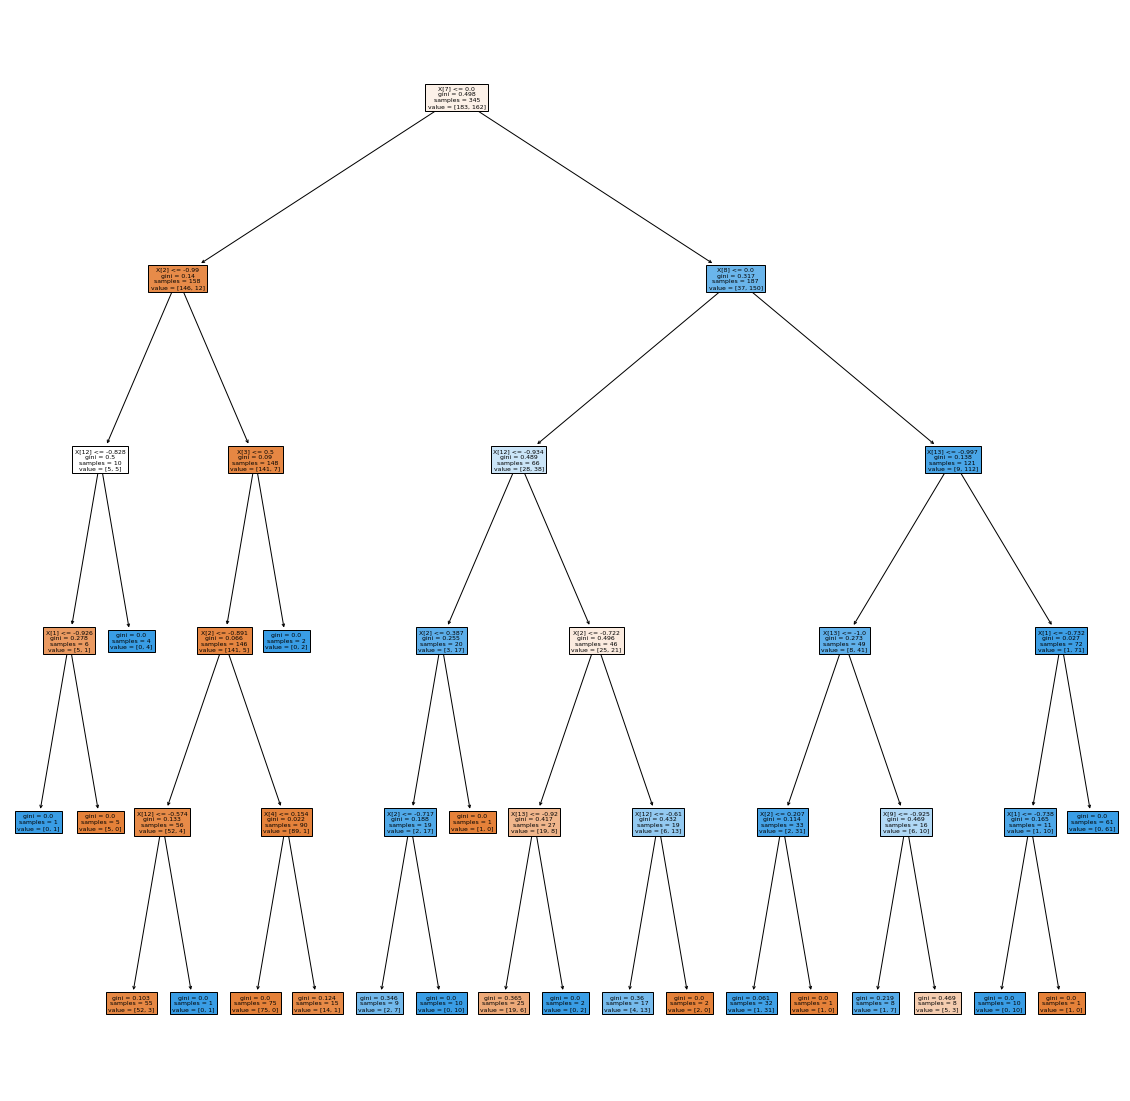

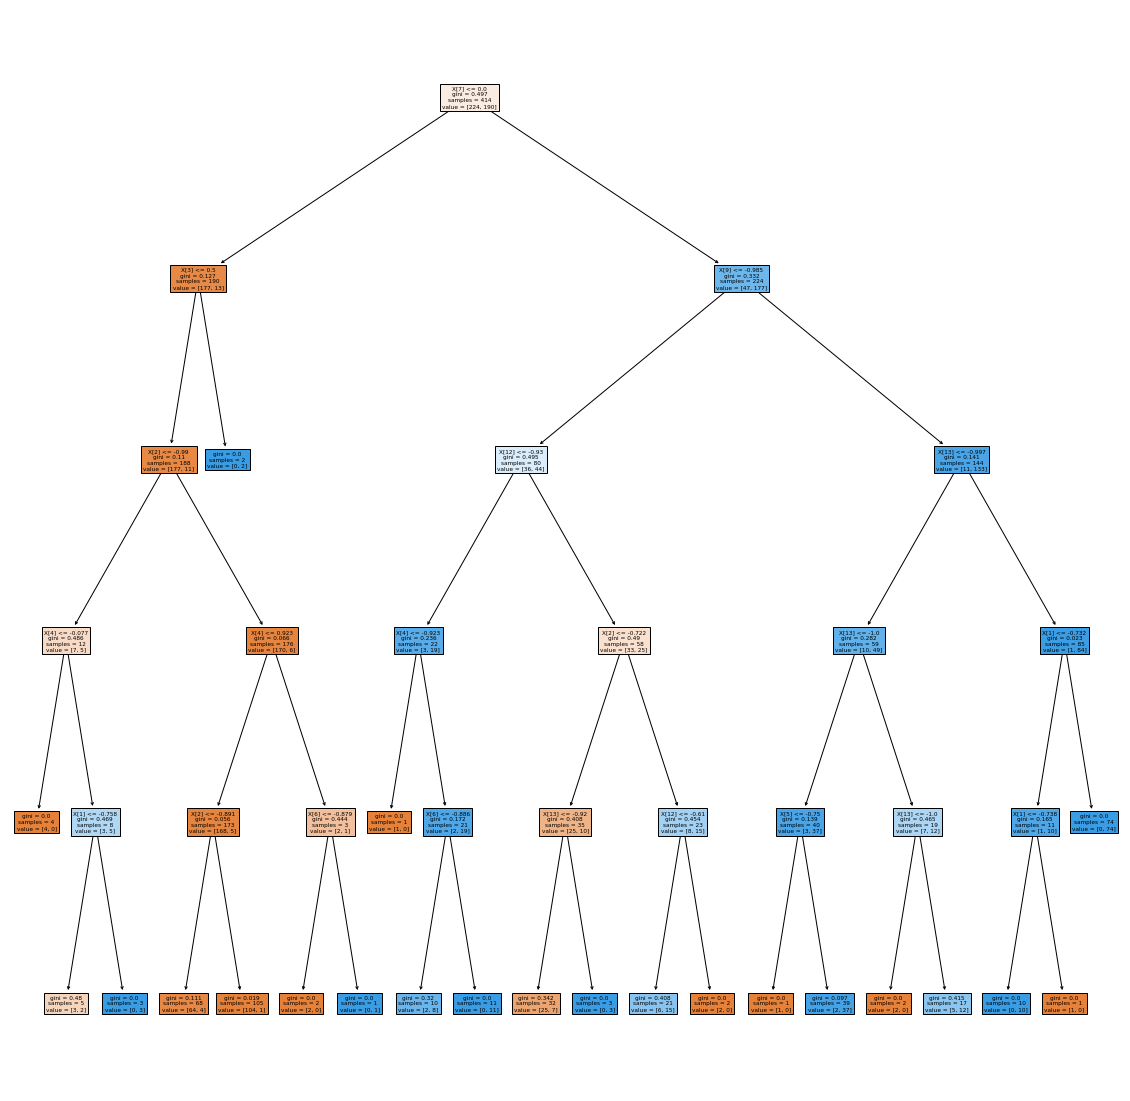

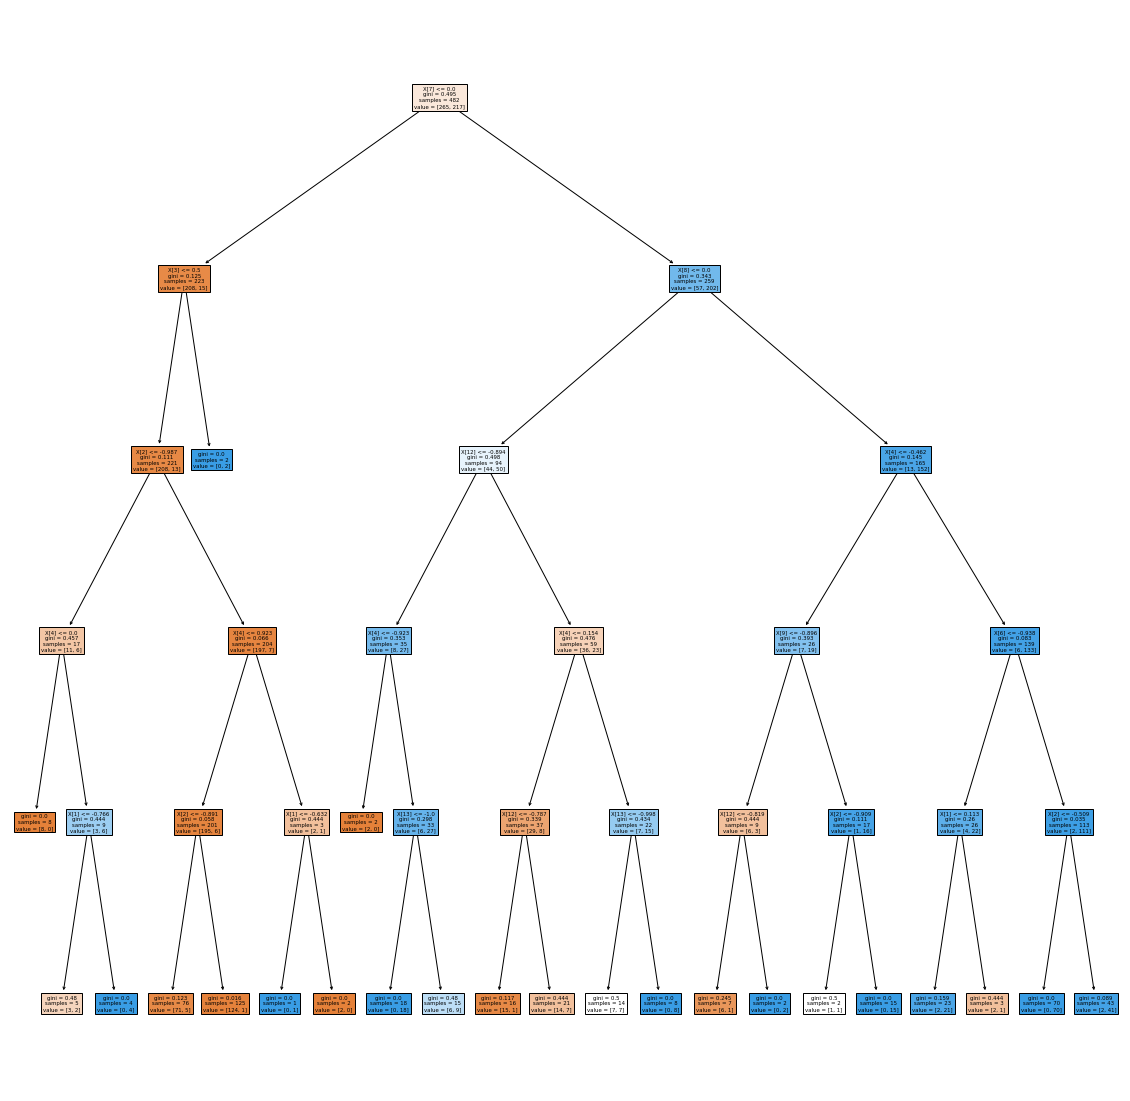

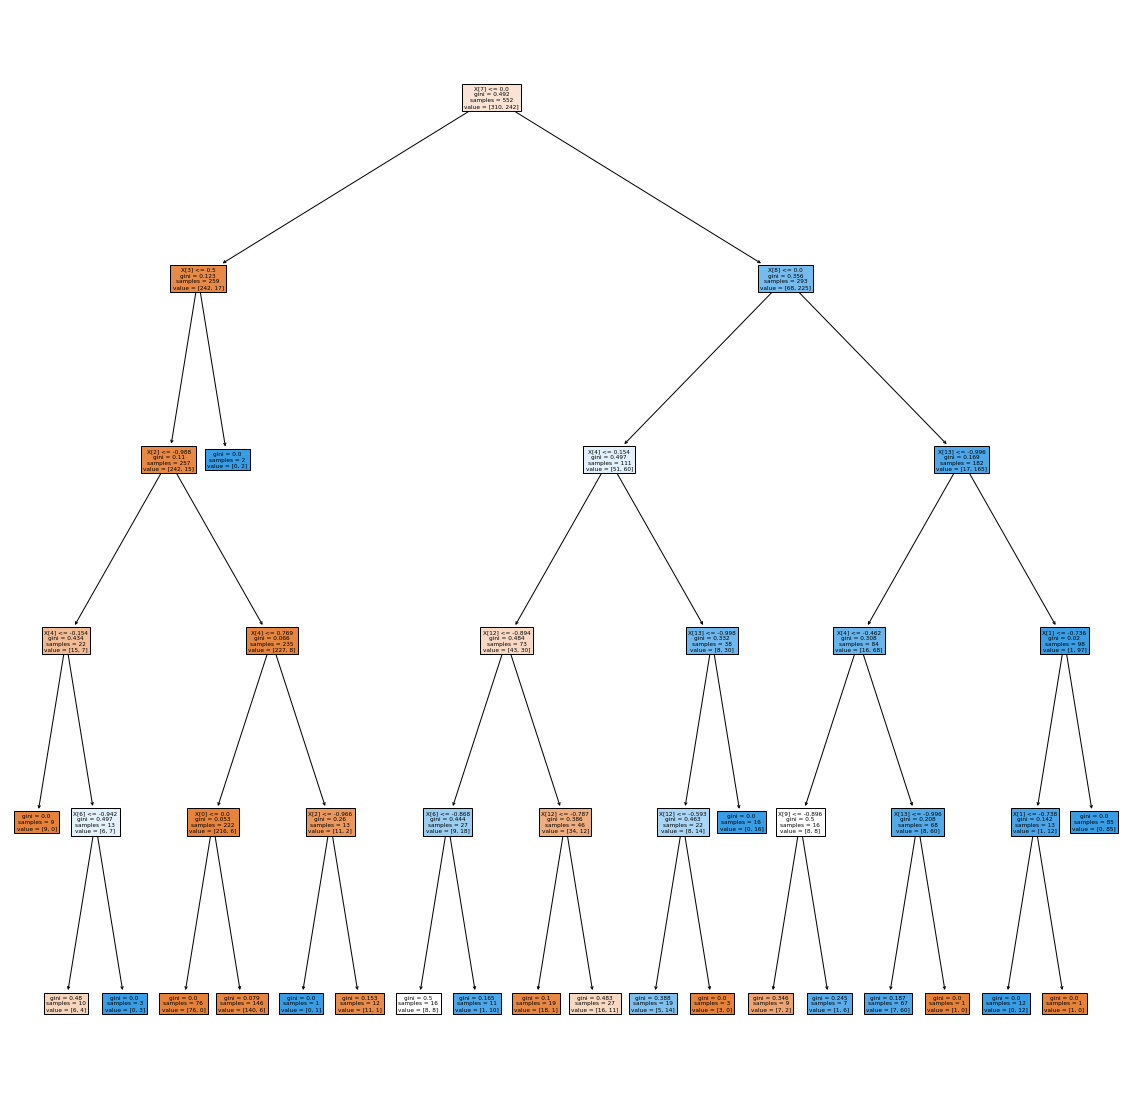

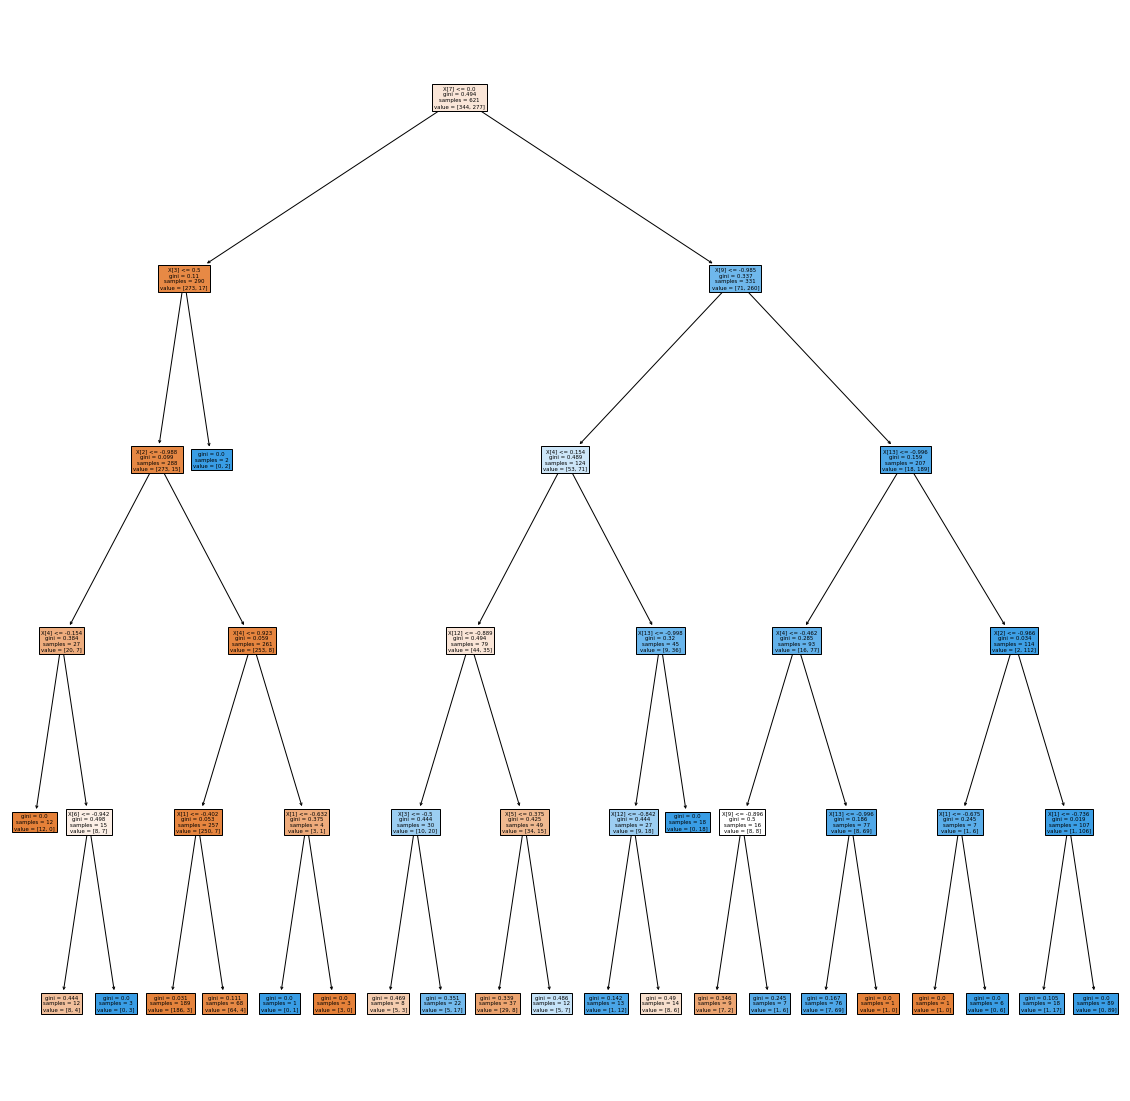

In [ ]:


partitions=[float(j*0.10) for j in range(9,0,-1)]

for i,size in enumerate(partitions):
  

  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=size, random_state=0)

  ml_tree = DecisionTreeClassifier(criterion='gini', max_depth=5) # Pre-pruning the tree with maximum depth=5
  ml_tree.fit(X_train, y_train)
  print('Tree No.{}, with test size of {}%, gives accuracy {} \n'.format(i, float("{:.2f}".format(partitions[i]))*100, accuracy_score(y_test, ml_tree.predict(X_test))))

  fig = plt.figure(figsize=(20,20))
  _ = tree.plot_tree(ml_tree, filled=True)
  fig.show()



**1.3** Are the previous trees very similar, or very different? Explain why.



*     The results are obviously **not** exactly similar. We observe that as we **decrease** the  *test set* size the whole corresponding tree tends to become more complicated and assymetrical, in terms of how many splits are been done under each leaf. However that's only natural, as the algorithm is supposed to perform better when more data are being provided during training.
*   No extreme overfitting can be noticed since we've used pre-pruning.
* The overall accuracy values for each partition exhibit small differencies, although, thwy do not seem to be dramatically affected the different *test size*. Of course a 20% data-split has a significant improvement when comparing to a 90% data-split. 
*In every visualization of our decision trees, we can observe that **different features** of the datasets have been used for making decisions on information gain. That is a strong indicator of how sensitive is this algorithm to small permutations/changes on the data that are being fed initially. 
* This  greedy method of seeking the best splits regardless of whether it's bumping on local minima or no, is strongly affected by the structure of the data (especially if we're talking about an unbalanced dataset).











## **2. Support Vector Machines**

**2.1** Run SVM to train a classifier, using radial basis as kernel function. Apply cross-validation to evaluate different combinations of values of the model hyper-parameters (box constraint $C$ and kernel parameter $\gamma$).

[*Support Vector Machines in [scikit-learn](https://scikit-learn.org/stable/modules/svm.html)*]

--2021-11-09 03:17:20--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/australian_scale
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71160 (69K)
Saving to: ‘australian_scale.4’

australian_scale.4  100%[===================>]  69.49K   136KB/s    in 0.5s    

2021-11-09 03:17:22 (136 KB/s) - ‘australian_scale.4’ saved [71160/71160]

 The optimal values for C and γ are:[10.0, 0.1] with score:0.8579710144927537


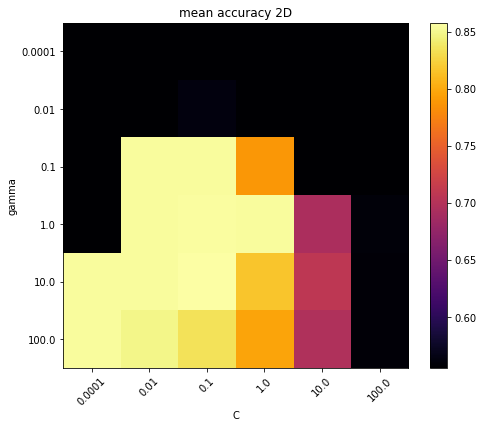

Text(0.5, 0, 'C')

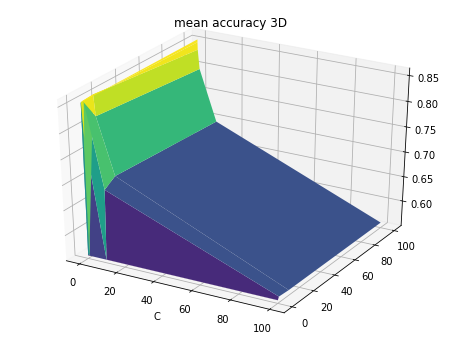

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import tqdm


!wget -t inf https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/australian_scale
X, y = load_svmlight_file('australian_scale')




#------------------APPROACH A: Using sklearn Cross Validation Accuracy scores to evaluate combinations of C and γ --------------#
#                                                                                                                               #


#choosing some random values
C = [0.0001, 0.01, 0.1, 1., 10., 100.]
gamma = [0.0001, 0.01, 0.1, 1., 10., 100.] 

scores_mean=np.zeros((len(C), len(gamma)))
scores_std=np.zeros((len(C), len(gamma)))

for i,c in enumerate(C):
  for j,g in enumerate(gamma):

    svm = SVC(kernel = 'rbf', gamma = g, C = c ,probability = False)
    scores = cross_val_score(svm, X, y, cv=5)

    
    scores_mean[i,j] = scores.mean()
    scores_std[i,j] = scores.std()






#Selecting C and γ for best accuracy scores (maximum values)

ind = np.argwhere(scores_mean == scores_mean.max()) # Save all indexes

C_i=ind[0,0]
g_i=ind[0,1]

#best values
C_best=C[C_i]
g_best=gamma[g_i]
best_score=scores_mean[C_i,g_i]


print('\033[1m'+" The optimal values for C and γ are:{} with score:{}".format([C_best,g_best],best_score)+ '\033[0m')

#Plots

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores_mean, cmap='inferno')
plt.xlabel('C')
plt.ylabel('gamma')
plt.colorbar()
plt.xticks(np.arange(len(gamma)), gamma, rotation=45)
plt.yticks(np.arange(len(C)), C)
plt.title('mean accuracy 2D')
plt.show()

plt.figure(figsize=(8, 6))
new_x, new_y = np.meshgrid(C, gamma)
ax = plt.axes(projection='3d')
ax.plot_surface(new_x,new_y, scores_mean, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none') #viridis
ax.set_title('mean accuracy 3D');
ax.set_xlabel('C')






In [ ]:
#------------------APPROACH B: Creating grid of C-γ values and applying 'Grid Search' cross validation method for optimal results --------------#
#                                                                                                                                               #

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

#Split data to save testing set for later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

#Introducing more intermediate hyperparameter choices using logspace
C = np.logspace(-2, 7, 10)
gamma =  np.logspace(-2, 7, 10)

#creating grid, performing cross validation and hunt the best parameters
grid_structure = dict(gamma = gamma, C = C)
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 20) #cross validation with 30% val.size
grid = GridSearchCV(SVC(), param_grid = grid_structure, cv = cv, verbose = 10) 
grid.fit(X_train, y_train)
print('\033[1m'+'The optimal values for C and γ are: {} with corresponding value : {}'.format(grid.best_params_, grid.best_score_)+ '\033[0m')


#Test to check generalization 

svm = SVC(kernel = 'rbf', C = 10.0, gamma = 0.1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('\033[1m'+'We achieve an accuracy of : {} '.format(accuracy_score(y_test, y_pred))+ '\033[0m')




Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.540, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.540, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.540, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.540, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.540, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.540, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


[CV] ................... C=0.01, gamma=1.0, score=0.540, total=   0.0s
[CV] C=0.01, gamma=1.0 ...............................................
[CV] ................... C=0.01, gamma=1.0, score=0.540, total=   0.0s
[CV] C=0.01, gamma=1.0 ...............................................
[CV] ................... C=0.01, gamma=1.0, score=0.540, total=   0.0s
[CV] C=0.01, gamma=1.0 ...............................................
[CV] ................... C=0.01, gamma=1.0, score=0.540, total=   0.0s
[CV] C=0.01, gamma=1.0 ...............................................
[CV] ................... C=0.01, gamma=1.0, score=0.540, total=   0.0s
[CV] C=0.01, gamma=10.0 ..............................................
[CV] .................. C=0.01, gamma=10.0, score=0.540, total=   0.0s
[CV] C=0.01, gamma=10.0 ..............................................
[CV] .................. C=0.01, gamma=10.0, score=0.540, total=   0.0s
[CV] C=0.01, gamma=10.0 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   17.6s finished


**2.2.** How sensitive is the cross-validation error to changes in $C$ and $\gamma$? Choose the combination of $C$ and $\gamma$ that minimizes the cross-validation error, train the SVM on the entire dataset and report the total classification error.

[*Advice: consider a binary class problem. Use a logaritmic ranges for $\gamma$ and $C$. You can use [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to display data a 2D plot.*]

**Review:**
The soft-margin hyperparameter $C$ tends to "punish" more complex solutions (big $w^Tw $): Decreasing $C$ should allow more misclassified data points in favor of a better hyperplane.In general a significantly high $C$ is risking generalization accuracy, where an extremely low one, is way to "loose" with the boundaries. Low values of $\gamma$ correspond to large similarity radius, where higher values tends to seperate more the data that are apart. We expect here an inversely proportional relation between the margin $\gamma$ and $C$, with the *optimal* combination lying somewhere  around "*the middle*". Extreme values are not viable choices  since an overely large $\gamma$ makes $C$ insignificant and symmetrically an extremely low $\gamma$ makes $C$ dominant.  
Based on our models we observe that a combination such that $C>\gamma$ just by a difference of *one order of magnitude* :  first method suggests $(C,\gamma)=(10.0 , 0.1)$ whereas the grid method indicates $(C,\gamma)=(0.1 , 0.01)$. In both cases there is some (not strong enough) evidence for the existance of an optimal "diagonal" line between these parameters (something that is almost visible in the 2d-colormap graph above, although more testing-iterations with different $C$'s and $\gamma$'s would defenately be needed to reaffirm that).

## **3. Multi-Layer Perceptrons**    $\implies$ **Lab 3**



**ACORDING TO THE INSTRUCTIONS OF  ANDERS, WILL SUBMIT THIS THIRD PART ON MLP's ALONG WITH NEXT WEEK'S ASSIGNMENT ON DEEP LEARNING** !